# hidden Markov model

In [36]:
import numpy as np
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
%matplotlib inline

### For simplictly, first consider the following case:

1. the mouse *always* chooses left
2. the state starts out in L = 0.8, R = 0.2
3. State switches after 'switch' plays
4. prior begins at [0.5,0.5]
5. transition matrix is

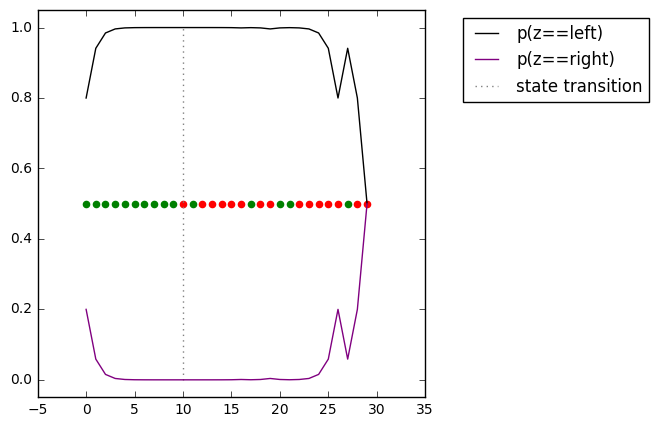

In [121]:
#set transition matrix
s = 0.5
T = np.array([[s,1.0-s],[s,1.0-s]])

n_plays = 30 # of trials
outcomes = [] #initialize record of outcomes (1 = reward, 0 = no reward)
f = np.zeros((n_plays,2)) #initialize forward probability matrix
switch = 10 # number of trials until the state switches

#initialize prior
prior = np.array([0.5,0.5])

'''
run algorithm
'''
for play in range(n_plays):
    
    #receive outcome according to current state probabilities
    if play < switch:
        outcomes.append(np.random.uniform() <= 0.8)
    else:
        outcomes.append(np.random.uniform() <= 0.2)
    
    #assign observation matrix according to the reward outcome
    if outcomes[-1] is True:
        O = np.array([[0.8,0],[0,0.2]])
    else:
        O = np.array([[0.2,0],[0,0.8]])
    
    #calculate forward probability
    f_ = O*T*prior
    f[play,:] = f_[f_ != 0] / f_.sum()
    
    #update prior
    prior = f[play]

#pull out the rewarded and non-reward trials (for plotting)
R_trials = np.where(np.asarray(outcomes) == True)[0]
NR_trials = np.where(np.asarray(outcomes) == False)[0] 


'''
Plot
'''
plt.figure(figsize=(5,5))
plt.plot(np.arange(n_plays),f[:,0],color='black',label='p(z==left)')
plt.plot(np.arange(n_plays),f[:,1],color='purple',label='p(z==right)')
plt.scatter(R_trials,np.zeros(R_trials.shape[0])+0.5,color='green')
plt.scatter(NR_trials,np.zeros(NR_trials.shape[0])+0.5,color='red')
plt.vlines(x=switch,ymin=0,ymax=1,color='grey',linestyles='dotted',label='state transition')
plt.ylim(-0.05,1.05)
plt.legend(bbox_to_anchor=(1.6,1))

In [58]:
np.where(np.asarray(outcomes) == True)[0]

array([0, 1, 2, 4, 5, 6, 8, 9])

In [61]:
np.zeros(np.where(np.asarray(outcomes)[0].shape[0]))

IndexError: tuple index out of range

In [53]:
outcomes

[True, True, True, True, True, True, True, True, True, True]